In [ ]:
import pandas as pd
dt = pd.read_csv("batch_corr_victor_2020_BLTL_TPM.csv")
dt.head(3)

,geneid,FC1_Control_BLTL_18_E862,FC1_Control_BLTL_19_E862,FC1_Control_BLTL_20_E863,FC1_Control_BLTL_21_E863,FC1_6_BLTL_07_E744,FC1_6_BLTL_08_E855,FC1_6_BLTL_09_E861,FC1_14_BLTL_13_E856,FC1_14_BLTL_14_E858,...,FC2_Control_BLTL_26_F283,FC2_Control_BLTL_27_F283,FC2_2_BLTL_28_F285,FC2_2_BLTL_29_F285,FC2_6_BLTL_30_F288,FC2_2_BLTL_31_F289,FC2_Control_BLTL_18_E862,FC2_Control_BLTL_19_E862,FC2_Control_BLTL_20_E863,FC2_Control_BLTL_21_E863
0,ENSG00000000003,35.091669,25.152904,34.680171,31.154636,26.831248,15.450121,17.832780,24.804160,11.898382,...,28.122686,33.308180,21.357608,15.205361,20.280844,23.661559,37.484949,21.854633,34.192136,35.258986
1,ENSG00000000005,0.594277,0.413477,0.099054,0.169448,0.684935,0.468866,0.107212,0.105057,0.005057,...,0.039812,0.208081,0.457655,0.706068,0.182781,0.269915,0.693100,0.280057,0.053351,0.082405
2,ENSG00000000419,34.365686,35.509777,31.925729,36.193271,46.226264,43.594335,36.665118,35.753814,27.685552,...,32.955774,29.330469,39.447109,46.371937,47.718105,39.840842,31.486484,29.617804,29.631216,34.100180


In [2]:
dt.shape

(60483, 23)

In [ ]:
meta = pd.read_csv("victor_deseq_meta.csv")
meta.head(3)

,sample,name,Model,days,FCs,sampleName
0,EBP_COVID_01-E126_ATCACG_S1_L001,FC1_01_E126,LoM,2,FC1,FC1_2_LoM_01_E126
1,EBP_COVID_02-E827_CGATGT_S2_L001,FC1_02_E827,LoM,2,FC1,FC1_2_LoM_02_E827
2,EBP_COVID_03-E732_TTAGGC_S3_L001,FC1_03_E732,LoM,2,FC1,FC1_2_LoM_03_E732


In [5]:
lom_meta = meta[(meta["Model"] == "LoM") & (meta["FCs"] == "FC1")]
lom_control_sample = list(lom_meta[lom_meta["days"] == "Control"]["sampleName"])
lom_day2_sample = [x for x in list(lom_meta[lom_meta["days"] == "2"]["sampleName"]) if x != 'FC1_2_LoM_03_E732']
lom_day6_sample = list(lom_meta[lom_meta["days"] == "6"]["sampleName"])
lom_day14_sample = list(lom_meta[lom_meta["days"] == "14"]["sampleName"])

In [6]:
"Naive", lom_control_sample, "Day2", lom_day2_sample, "Day6", lom_day6_sample, "Day14", lom_day14_sample

('Naive',
 ['FC1_Control_LoM_16_E840',
  'FC1_Control_LoM_17_E844',
  'FC1_Control_LoM_22_E128',
  'FC1_Control_LoM_23_E838'],
 'Day2',
 ['FC1_2_LoM_01_E126', 'FC1_2_LoM_02_E827'],
 'Day6',
 ['FC1_6_LoM_04_E130', 'FC1_6_LoM_05_E434', 'FC1_6_LoM_06_E829'],
 'Day14',
 ['FC1_14_LoM_10_E127', 'FC1_14_LoM_11_E739', 'FC1_14_LoM_12_E832'])

In [7]:
meta[(meta["Model"] == "LoM") & (meta["FCs"] == "FC1")]

,sample,name,Model,days,FCs,sampleName
0,EBP_COVID_01-E126_ATCACG_S1_L001,FC1_01_E126,LoM,2,FC1,FC1_2_LoM_01_E126
1,EBP_COVID_02-E827_CGATGT_S2_L001,FC1_02_E827,LoM,2,FC1,FC1_2_LoM_02_E827
2,EBP_COVID_03-E732_TTAGGC_S3_L001,FC1_03_E732,LoM,2,FC1,FC1_2_LoM_03_E732
3,EBP_COVID_04-E130_TGACCA_S4_L001,FC1_04_E130,LoM,6,FC1,FC1_6_LoM_04_E130
4,EBP_COVID_05-E434_ACAGTG_S5_L001,FC1_05_E434,LoM,6,FC1,FC1_6_LoM_05_E434
5,EBP_COVID_06-E829_GCCAAT_S6_L001,FC1_06_E829,LoM,6,FC1,FC1_6_LoM_06_E829
9,EBP_COVID_10-E127_TAGCTT_S10_L001,FC1_10_E127,LoM,14,FC1,FC1_14_LoM_10_E127
10,EBP_COVID_11-E739_GGCTAC_S11_L001,FC1_11_E739,LoM,14,FC1,FC1_14_LoM_11_E739
11,EBP_COVID_12-E832_CTTGTA_S12_L001,FC1_12_E832,LoM,14,FC1,FC1_14_LoM_12_E832
15,EBP_COVID_16-E840_CCGTCC_S16_L001,FC1_16_E840,LoM,Control,FC1,FC1_Control_LoM_16_E840


In [5]:
bltl_meta = meta[meta["Model"] == "BLTL"]

In [6]:
bltl_dt = dt[["geneid"] + list(bltl_meta["sampleName"])]
bltl_dt.head(2)

,geneid,FC1_6_BLTL_07_E744,FC1_6_BLTL_08_E855,FC1_6_BLTL_09_E861,FC1_14_BLTL_13_E856,FC1_14_BLTL_14_E858,FC1_14_BLTL_15_E860,FC1_Control_BLTL_18_E862,FC1_Control_BLTL_19_E862,FC1_Control_BLTL_20_E863,...,FC2_Control_BLTL_20_E863,FC2_Control_BLTL_21_E863,FC2_6_BLTL_24_F168,FC2_2_BLTL_25_F276,FC2_Control_BLTL_26_F283,FC2_Control_BLTL_27_F283,FC2_2_BLTL_28_F285,FC2_2_BLTL_29_F285,FC2_6_BLTL_30_F288,FC2_2_BLTL_31_F289
0,ENSG00000000003,26.831248,15.450121,17.832780,24.804160,11.898382,24.737861,35.091669,25.152904,34.680171,...,34.192136,35.258986,27.325257,9.293921,28.122686,33.308180,21.357608,15.205361,20.280844,23.661559
1,ENSG00000000005,0.684935,0.468866,0.107212,0.105057,0.005057,0.107454,0.594277,0.413477,0.099054,...,0.053351,0.082405,0.093247,0.048155,0.039812,0.208081,0.457655,0.706068,0.182781,0.269915


In [7]:
bltl_dt.shape

(60483, 23)

In [8]:
bltl_control = bltl_dt[["geneid"] + list(bltl_meta[bltl_meta["days"] == "Control"]["sampleName"])]
bltl_day2 = bltl_dt[["geneid"] + list(bltl_meta[bltl_meta["days"] == "2"]["sampleName"])]
bltl_day6 = bltl_dt[["geneid"] + list(bltl_meta[bltl_meta["days"] == "6"]["sampleName"])]
bltl_day14 = bltl_dt[["geneid"] + list(bltl_meta[bltl_meta["days"] == "14"]["sampleName"])]


In [9]:
bltl_control.head(3)

,geneid,FC1_Control_BLTL_18_E862,FC1_Control_BLTL_19_E862,FC1_Control_BLTL_20_E863,FC1_Control_BLTL_21_E863,FC2_Control_BLTL_18_E862,FC2_Control_BLTL_19_E862,FC2_Control_BLTL_20_E863,FC2_Control_BLTL_21_E863,FC2_Control_BLTL_26_F283,FC2_Control_BLTL_27_F283
0,ENSG00000000003,35.091669,25.152904,34.680171,31.154636,37.484949,21.854633,34.192136,35.258986,28.122686,33.308180
1,ENSG00000000005,0.594277,0.413477,0.099054,0.169448,0.693100,0.280057,0.053351,0.082405,0.039812,0.208081
2,ENSG00000000419,34.365686,35.509777,31.925729,36.193271,31.486484,29.617804,29.631216,34.100180,32.955774,29.330469


In [10]:
ctrl6 = ['FC2_Control_BLTL_26_F283',
 'FC2_Control_BLTL_27_F283',
 'FC1_Control_BLTL_18_E862',
 'FC1_Control_BLTL_19_E862',
 'FC1_Control_BLTL_20_E863',
 'FC1_Control_BLTL_21_E863',]

In [10]:
# bltl_control_data = bltl_dt[list(bltl_meta[bltl_meta["days"] == "Control"]["sampleName"])]
bltl_control_data = bltl_dt[ctrl6]
control_avg = []
for _,row in bltl_control_data.iterrows():
    control_avg.append(sum(list(row))/bltl_control_data.shape[1])

In [11]:
bltl_control_data.head(3)

,FC2_Control_BLTL_26_F283,FC2_Control_BLTL_27_F283,FC1_Control_BLTL_18_E862,FC1_Control_BLTL_19_E862,FC1_Control_BLTL_20_E863,FC1_Control_BLTL_21_E863
0,28.122686,33.308180,35.091669,25.152904,34.680171,31.154636
1,0.039812,0.208081,0.594277,0.413477,0.099054,0.169448
2,32.955774,29.330469,34.365686,35.509777,31.925729,36.193271


In [12]:
bltl_day2_data = bltl_dt[list(bltl_meta[bltl_meta["days"] == "2"]["sampleName"])]
day2_avg = []
for _,row in bltl_day2_data.iterrows():
    day2_avg.append(sum(list(row))/bltl_day2_data.shape[1])

In [13]:
bltl_day6_data = bltl_dt[list(bltl_meta[bltl_meta["days"] == "6"]["sampleName"])]
day6_avg = []
for _,row in bltl_day6_data.iterrows():
    day6_avg.append(sum(list(row))/bltl_day6_data.shape[1])

In [14]:
bltl_day14_data = bltl_dt[list(bltl_meta[bltl_meta["days"] == "14"]["sampleName"])]
day14_avg = []
for _,row in bltl_day14_data.iterrows():
    day14_avg.append(sum(list(row))/bltl_day14_data.shape[1])

In [15]:
"Naive", list(bltl_control_data.columns), "Day2", list(bltl_day2_data.columns), "Day6", list(bltl_day6_data.columns), "Day14", list(bltl_day14_data.columns)

('Naive',
 ['FC2_Control_BLTL_26_F283',
  'FC2_Control_BLTL_27_F283',
  'FC1_Control_BLTL_18_E862',
  'FC1_Control_BLTL_19_E862',
  'FC1_Control_BLTL_20_E863',
  'FC1_Control_BLTL_21_E863'],
 'Day2',
 ['FC2_2_BLTL_25_F276',
  'FC2_2_BLTL_28_F285',
  'FC2_2_BLTL_29_F285',
  'FC2_2_BLTL_31_F289'],
 'Day6',
 ['FC1_6_BLTL_07_E744',
  'FC1_6_BLTL_08_E855',
  'FC1_6_BLTL_09_E861',
  'FC2_6_BLTL_24_F168',
  'FC2_6_BLTL_30_F288'],
 'Day14',
 ['FC1_14_BLTL_13_E856', 'FC1_14_BLTL_14_E858', 'FC1_14_BLTL_15_E860'])

In [16]:
bltl_heatmap = pd.DataFrame({"id":list(dt["geneid"]), "Naive":control_avg, "Day2":day2_avg, "Day6":day6_avg, "Day14":day14_avg})

In [17]:
bltl_heatmap.head(3)

,id,Naive,Day2,Day6,Day14
0,ENSG00000000003,31.251707,17.379613,21.544050,20.480134
1,ENSG00000000005,0.254025,0.370448,0.307408,0.072523
2,ENSG00000000419,33.380118,40.754165,43.216573,30.184313


In [18]:
bltl_heatmap["id"] = [x.split(".")[0] for x in bltl_heatmap["id"]]
bltl_heatmap.head(3)

,id,Naive,Day2,Day6,Day14
0,ENSG00000000003,31.251707,17.379613,21.544050,20.480134
1,ENSG00000000005,0.254025,0.370448,0.307408,0.072523
2,ENSG00000000419,33.380118,40.754165,43.216573,30.184313


In [19]:
import numpy as np

In [11]:
interferon = ["ENSG00000171855", "ENSG00000187608", "ENSG00000135114", "ENSG00000183486", "ENSG00000185885",
             "ENSG00000157601", "ENSG00000089127", "ENSG00000119922", "ENSG00000119917", "ENSG00000111331"]
cytokine = ["ENSG00000169245", "ENSG00000169248", "ENSG00000108688", "ENSG00000138755", "ENSG00000169429",
           "ENSG00000081041", "ENSG00000108700", "ENSG00000271503", "ENSG00000136244", "ENSG00000197272",
           "ENSG00000163734", "ENSG00000124391", "ENSG00000232810"]
inflammation = ["ENSG00000136634", "ENSG00000125538", "ENSG00000136244", "ENSG00000169194", "ENSG00000137033", "ENSG00000142224", "ENSG00000108691", "ENSG00000102970", "ENSG00000102962", "ENSG00000163734", "ENSG00000128342", "ENSG00000171855", "ENSG00000262406", "ENSG00000136997"]


In [ ]:
anno = pd.read_csv("gencode.v39.annotation.geneIDgeneName.csv")
anno.head(3)

,geneid,gene_name
0,ENSG00000223972,DDX11L1
1,ENSG00000227232,WASH7P
2,ENSG00000278267,MIR6859-1


In [21]:
anno.columns = ['id', 'Inflammation genes(TPM)']
bltl_heatmap_map = pd.merge(bltl_heatmap, anno, on="id", how="left")
bltl_heatmap_map.head(3)

,id,Naive,Day2,Day6,Day14,Inflammation genes(TPM)
0,ENSG00000000003,31.251707,17.379613,21.544050,20.480134,TSPAN6
1,ENSG00000000005,0.254025,0.370448,0.307408,0.072523,TNMD
2,ENSG00000000419,33.380118,40.754165,43.216573,30.184313,DPM1


In [ ]:
inflammationPlotData = bltl_heatmap_map[bltl_heatmap_map["id"].isin(inflammation)]
standard = pd.DataFrame({"id":inflammation})
inflammationPlotData = pd.merge(standard, inflammationPlotData, on="id", how="left")

inflammationPlotData = inflammationPlotData.set_index("Inflammation genes(TPM)")

inflammationPlotData = inflammationPlotData[["Naive", "Day2", "Day6", "Day14"]]
inflammationPlotData

,Naive,Day2,Day6,Day14
Inflammation genes(TPM),,,,
IL10,1.751362,1.582248,2.780699,1.293491
IL1B,7.295188,8.638432,10.642733,6.567696
IL6,1.279492,3.273927,4.845263,1.601096
IL13,0.113272,0.222193,0.116192,0.214208
IL33,50.176590,43.733705,51.689693,48.776326
IL19,0.046112,0.013986,0.019478,0.034362
CCL2,200.460664,410.102835,460.605904,179.418096
CCL17,2.422392,1.252216,3.100157,7.233829
CCL22,2.878623,1.925722,2.135938,5.108332


In [25]:
anno.columns = ['id', 'Interferon genes(TPM)']
bltl_heatmap_map = pd.merge(bltl_heatmap, anno, on="id", how="left")
bltl_heatmap_map.head(3)

,id,Naive,Day2,Day6,Day14,Interferon genes(TPM)
0,ENSG00000000003,31.251707,17.379613,21.544050,20.480134,TSPAN6
1,ENSG00000000005,0.254025,0.370448,0.307408,0.072523,TNMD
2,ENSG00000000419,33.380118,40.754165,43.216573,30.184313,DPM1


In [ ]:
interferonPlotData = bltl_heatmap_map[bltl_heatmap_map["id"].isin(interferon)]
standard = pd.DataFrame({"id":interferon})
interferonPlotData = pd.merge(standard, interferonPlotData, on="id", how="left")

interferonPlotData = interferonPlotData.set_index("Interferon genes(TPM)")

interferonPlotData = interferonPlotData[["Naive", "Day2", "Day6", "Day14"]]
interferonPlotData.to_csv("BLTL_Interferon_genes.csv")
interferonPlotData

,Naive,Day2,Day6,Day14
Interferon genes(TPM),,,,
IFNB1,0.029545,0.902007,1.034079,0.059827
ISG15,278.352916,2816.305543,3000.222633,340.548176
OASL,11.740102,73.355132,87.037225,19.689341
MX2,21.931493,148.935470,161.491797,29.236270
IFITM1,471.797439,1793.961687,1890.529572,402.167259
MX1,95.044496,584.630539,588.693418,133.199628
OAS1,77.143012,313.802949,419.888620,97.052433
IFIT2,22.140407,146.614342,155.238445,29.782863
IFIT3,63.278895,245.270248,244.349291,54.886534


In [ ]:
anno.columns = ['id', 'Cytokine genes(TPM)']
bltl_heatmap_map = pd.merge(bltl_heatmap, anno, on="id", how="left")
bltl_heatmap_map.head(3)
cytokinePlotData = bltl_heatmap_map[bltl_heatmap_map["id"].isin(cytokine)]
standard = pd.DataFrame({"id":cytokine})
cytokinePlotData = pd.merge(standard, cytokinePlotData, on="id", how="left")

cytokinePlotData = cytokinePlotData.set_index("Cytokine genes(TPM)")

cytokinePlotData = cytokinePlotData[["Naive", "Day2", "Day6", "Day14"]]
cytokinePlotData.to_csv("BLTL_Cytokine_genes.csv")
cytokinePlotData

,Naive,Day2,Day6,Day14
Cytokine genes(TPM),,,,
CXCL10,161.623779,429.783558,393.041122,55.957249
CXCL11,39.607713,120.563936,100.027707,20.932198
CCL7,0.510480,1.765090,6.948482,1.053986
CXCL9,35.842405,33.821870,38.938218,36.200753
CXCL8,3.617555,8.736573,16.492389,5.018164
CXCL2,9.104423,23.668675,17.011997,14.731087
CCL8,18.141993,53.258562,87.059885,7.417907
CCL5,70.669458,73.082832,98.184368,65.469549
IL6,1.279492,3.273927,4.845263,1.601096


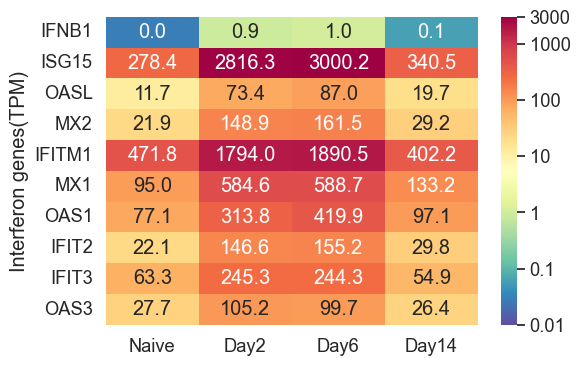

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as tkr
sns.set(style="white", font_scale=1.2)
# from matplotlib.ticker import LogLocator

plt.figure(figsize=(6,4))
vmax = 3000
vmin = 0.01
cbar_ticks = [0.01, 0.1, 1, 10, 100, 1000, 3000]
formatter = tkr.FixedFormatter(cbar_ticks) #tkr.ScalarFormatter(useMathText=True)
# formatter.set_scientific(False)        #'%.2f'
log_norm = LogNorm(vmin=vmin, vmax=vmax)
ax = sns.heatmap(interferonPlotData, vmax=vmax, vmin=vmin, norm=log_norm, cbar_kws={"ticks": cbar_ticks, "format": formatter}, cmap="Spectral_r", annot=True, fmt=".1f")
ax.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)

#sns.heatmap(interferonPlotData, cbar_kws={"ticks":[0.01,0.1,1,10,100]}, vmin = 0.01, vmax=100)
plt.yticks(rotation=0)

name = "BLTL Interferon genes"
plt.savefig('/Users/hongwei/Desktop/' + name + '.png', dpi=400, bbox_inches='tight')
plt.show()

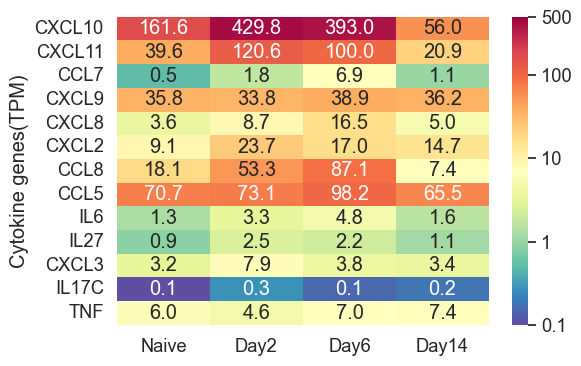

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as tkr
sns.set(style="white", font_scale=1.2)
# from matplotlib.ticker import LogLocator

plt.figure(figsize=(6,4))
vmax = 500
vmin = 0.1
cbar_ticks = [0.1, 1, 10, 100, 500]
formatter = tkr.FixedFormatter(cbar_ticks) #tkr.ScalarFormatter(useMathText=True)
# formatter.set_scientific(False)
log_norm = LogNorm(vmin=vmin, vmax=vmax)
ax = sns.heatmap(cytokinePlotData, vmax=vmax, vmin=vmin, norm=log_norm, cbar_kws={"ticks": cbar_ticks, "format": formatter}, cmap="Spectral_r", annot=True, fmt=".1f")
ax.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)

plt.yticks(rotation=0)

name = "BLTL Cytokine genes"
plt.savefig('/Users/hongwei/Desktop/' + name + '.png', dpi=400, bbox_inches='tight')
plt.show()

## Adaptive Immune Response Gene List

In [ ]:
import pandas as pd
IFNA_PlotData = pd.read_csv("BLTL_INFAsubtypesPlotData.csv")
IFNA_PlotData.head(2)

,IFNA subtypes(TPM),Naive,Day2,Day6,Day14
0,IFNA1,0.019054,0.637927,0.277135,0.30545
1,IFNA2,0.001748,0.354860,0.247613,0.00000


In [41]:
IFNA_PlotData = IFNA_PlotData.set_index(["IFNA subtypes(TPM)"])
IFNA_PlotData.head(2)

,Naive,Day2,Day6,Day14
IFNA subtypes(TPM),,,,
IFNA1,0.019054,0.637927,0.277135,0.30545
IFNA2,0.001748,0.354860,0.247613,0.00000


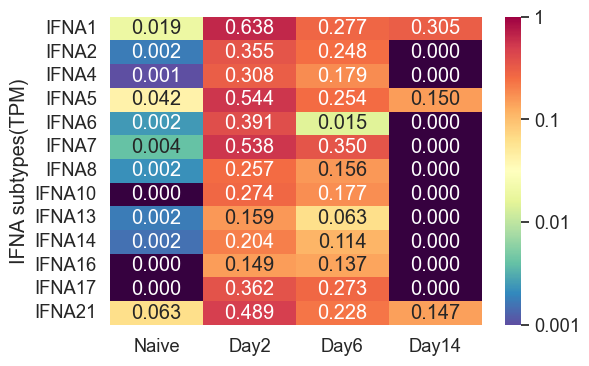

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as tkr
sns.set(style="white", font_scale=1.2)
# from matplotlib.ticker import LogLocator

plt.figure(figsize=(6,4))
vmax = 1
vmin = 0.001
cbar_ticks = [0.001, 0.01, 0.1, 1]
formatter = tkr.FixedFormatter(cbar_ticks) #tkr.ScalarFormatter(useMathText=True)
# formatter.set_scientific(False)        #'%.2f'
log_norm = LogNorm(vmin=vmin, vmax=vmax)

cmap = plt.cm.Spectral_r
cmap.set_bad(color="#36013F")

ax = sns.heatmap(IFNA_PlotData, vmax=vmax, vmin=vmin, norm=log_norm, cbar_kws={"ticks": cbar_ticks, "format": formatter}, cmap=cmap, annot=True, fmt=".3f")
ax.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)

#sns.heatmap(interferonPlotData, cbar_kws={"ticks":[0.01,0.1,1,10,100]}, vmin = 0.01, vmax=100)
plt.yticks(rotation=0)

name = "BLTL IFNA subtypes"
plt.savefig('/Users/hongwei/Desktop/' + name + '.png', dpi=400, bbox_inches='tight')
plt.show()